# Cursos de Series de tiempo con *Machine Learning*
## Modulo 35. Modelo de Árbol de Decisión
                        Elaborado por: Naren Castellon

<c0en ter><img src="https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/imagen/pronostico_arbol.png" width="1100" height="50"></center>

# Árbol de Decisión

En este cuaderno, vamos a descubrir el modelo de árbol de decisiones. Es uno de los modelos de **Machine Learning** no lineal más simples.

La idea detrás del modelo del árbol de decisiones se puede entender intuitivamente como una larga lista de declaraciones *if-else*. Esas decisiones *if-else* se usarían en la etapa de predicción: el modelo predice algún resultado $x$ si cierta condición es verdadera, y predecirá $y$ en caso contrario. Como puede ver, no existe una tendencia lineal en este tipo de lógica y, debido a esto, un modelo de árbol de decisión puede adaptarse a tendencias no lineales.

Veamos un ejemplo de esta lógica de árbol de decisión en la práctica, sin discutir aún de dónde proviene el árbol de decisión. La figura de abajo muestra un árbol de decisión de ejemplo que puede ayudarlo a comprender intuitivamente cómo podría funcionar un árbol de decisión. Muestra un árbol de decisión que pronostica la precipitación promedio según la zona climática y la estación.

<center><img src="imagen/decision tree.jpg" width="450" height="50"></center>

## Matemáticas
Ahora descubrirá los componentes matemáticos y algorítmicos del algoritmo del árbol de decisión. Hay diferentes formas de ajustar los árboles de decisión, pero la más común es tener dos pasos: dividir (también llamado hacer crecer) el árbol y podarlo.

## Splitting
Ahora que ha visto que el árbol de decisiones es simplemente una ordenación jerárquica de múltiples divisiones de decisiones, la pregunta lógica es de dónde provienen esas decisiones.

Todo comienza con un conjunto de datos en el que tiene una variable objetivo y múltiples variables explicativas. Ahora es posible una gran cantidad de divisiones, pero debe elegir una. La primera división debe ser la división que obtenga el error cuadrático medio más bajo. Al final, incluso un modelo con una sola división podría usarse como modelo predictivo.

Ahora que conoce el objetivo de su división, lo único que queda por hacer es probar cada división posible y evaluar cuál de ellas da como resultado el error cuadrático medio más bajo. Una vez que haya identificado la mejor primera división, obtendrá dos grupos. Luego repite este procedimiento para cada uno de los dos grupos, de modo que luego obtenga cuatro grupos y así sucesivamente.

En algún momento, no se puede dividir más. Este punto es cuando solo hay un punto de datos en cada grupo. Lógicamente, un solo punto de datos no se puede dividir.

## Podar y reducción de la complejidad del Árbol
Aunque es posible dejar que el árbol continúe dividiéndose hasta que sea imposible dividirlo más, no es necesariamente lo mejor que se puede hacer. También existe la posibilidad de permitir tener un poco más de puntos de datos en un grupo para evitar el sobreajuste.

Esto se puede obtener de múltiples maneras. Algunas implementaciones permiten un proceso de poda, que primero obliga a un árbol a dividir todo por completo y luego agrega la fase de poda para cortar aquellas ramas que menos se necesitan.

Otras implementaciones le permiten simplemente agregar un parámetro de complejidad que evitará directamente que los árboles se vuelvan demasiado detallados. Este es un parámetro que es una excelente opción para optimizar usando un `GridSearchcv`.

## Ejemplo
En este cuaderno, trabajará con datos que provienen de una empresa de bicicletas compartidas. 

Este será un ejemplo difícil. En este conjunto de datos, predecirá la cantidad de usuarios de bicicletas de alquiler por día. Y como puedes imaginar, esto dependerá fuertemente del clima. Como he sabido, el clima es difícil de predecir, y si su pronóstico tiene una fuerte correlación con el clima, sabe que será un gran desafío.


## 1-1. Importar los datos de la bicicleta

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)#Visualizamos todas las columnas

In [72]:
data = pd.read_csv('data/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [73]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [74]:
#DataFrame['Year'] = data["dteday"].dt.year
data["year"]=data["dteday"].dt.year

In [55]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011


In [24]:
df=data[["dteday","cnt"]]
df = df.set_index("dteday")
df.head()

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


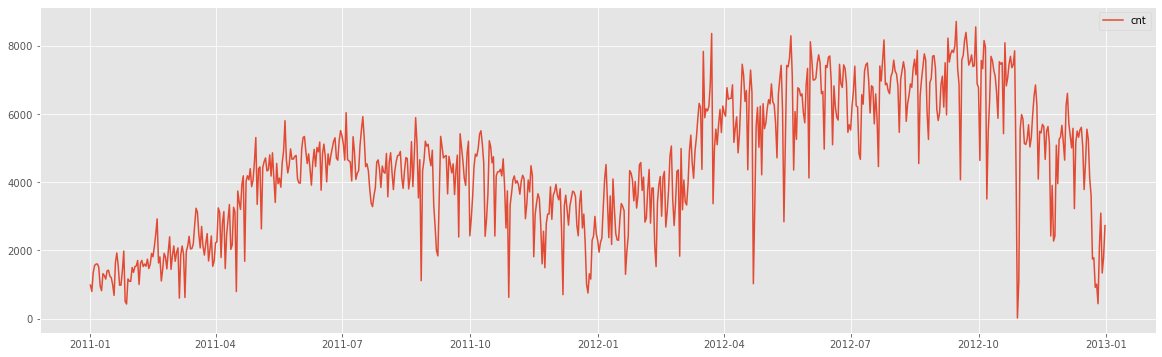

In [9]:
plt.figure(figsize=(20,6))
plt.plot(df, linestyle="-", label="cnt")
plt.legend()
plt.show();

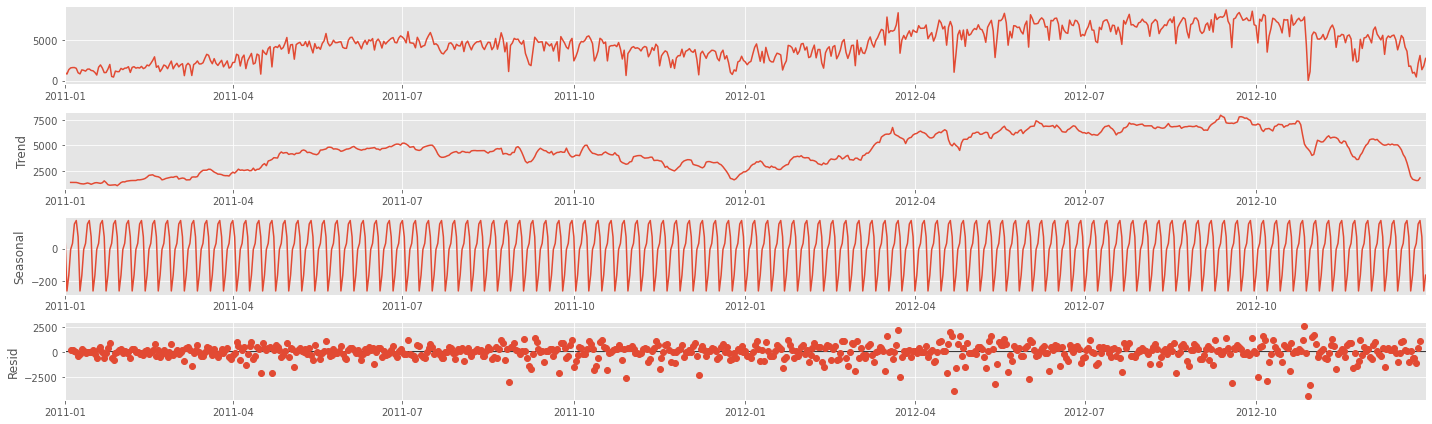

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose 
plt.rcParams["figure.figsize"] = (20, 6)
a = seasonal_decompose(df, model = "add")
a.plot();

Como puede ver en el gráfico, muchas cosas están sucediendo aquí. Hay una tendencia difícil de estimar. También hay mucha variación día a día. Cuando observa el conjunto de datos, puede ver que hay muchos datos sobre el clima. Este va a ser el reto: el número de usuarios de bicicletas compartidas depende mucho del clima del día, pero el clima no es algo que puedas saber de antemano.

Lo único que puede hacer en tales casos es intentar hacer mucha ingeniería de características para crear muchas variables valiosas para el modelo. a continuación vamos utilizar algunas de las variables existentes y veremos cómo crear una serie de variables. La lista total de valores explicativos es la siguiente:

* Variable original 'temporada': (1:primavera, 2:verano, 3:otoño, 4:invierno)
* Variable original 'yr': El año
* Variable original 'mes': El mes
* Variable original 'vacaciones': Si el día es feriado
* Variable original 'día de la semana': El día de la semana
* Variable original 'día laborable': si el día es feriado/ fin de semana o dia laborable
* Los 7 últimos días de 'cnt': Un componente autorregresivo para el número de usuarios
* Los 7 últimos días de 'weathersit': El tiempo, del 4 (muy mal tiempo) al 1 (buen tiempo)
* Los 7 últimos días de ‘temperatura’
* Los 7 últimos días de ‘humedad’

También eliminará un valor atípico influyente en el conjunto de datos. Esta es una observación extrema, y es difícil entender por qué sucedió. Puede verlo en la Figura 12-2, como un pico muy bajo que ocurre en el índice 477. Como puede influir negativamente en el modelo, es mejor no incluirlo en los datos de entrenamiento.

Hay otro pico bajo en algún lugar entre 650 y 700, pero como esta parte de los datos será nuestro conjunto de prueba, sería injusto hacerle un tratamiento. Eliminar los valores atípicos del conjunto de prueba sería hacer trampa, ya que esto haría que nuestra puntuación de prueba fuera más alta que la realidad. El objetivo siempre es tener una estimación del error del modelo lo más confiable posible, para anticipar su comportamiento al aplicar el modelo en la práctica.

## 1-2. Creando el conjunto de Datos de Entrenamiento

In [75]:
data["cnt"]=np.log(data["cnt"])

In [58]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,6.892642,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,6.685861,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,7.207119,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,7.353722,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,7.377759,2011


In [76]:
data = data.set_index("dteday")

In [77]:
# 7 últimos días de conteo de usuarios (autoregresión)
data['usersL1'] = data['cnt'].shift(1)
data['usersL2'] = data['cnt'].shift(2)
data['usersL3'] = data['cnt'].shift(3)
data['usersL4'] = data['cnt'].shift(4)
data['usersL5'] = data['cnt'].shift(5)
data['usersL6'] = data['cnt'].shift(6)
data['usersL7'] = data['cnt'].shift(7)

# 7 últimos días de weathersit
data['weatherL1'] = data['weathersit'].shift(1)
data['weatherL2'] = data['weathersit'].shift(2)
data['weatherL3'] = data['weathersit'].shift(3)
data['weatherL4'] = data['weathersit'].shift(4)
data['weatherL5'] = data['weathersit'].shift(5)
data['weatherL6'] = data['weathersit'].shift(6)
data['weatherL7'] = data['weathersit'].shift(7)

# 7 últimos días de temperatura
data['tempL1'] = data['temp'].shift(1)
data['tempL2'] = data['temp'].shift(2)
data['tempL3'] = data['temp'].shift(3)
data['tempL4'] = data['temp'].shift(4)
data['tempL5'] = data['temp'].shift(5)
data['tempL6'] = data['temp'].shift(6)
data['tempL7'] = data['temp'].shift(7)

# 7 últimos días de humedad
data['humL1'] = data['hum'].shift(1)
data['humL2'] = data['hum'].shift(2)
data['humL3'] = data['hum'].shift(3)
data['humL4'] = data['hum'].shift(4)
data['humL5'] = data['hum'].shift(5)
data['humL6'] = data['hum'].shift(6)
data['humL7'] = data['hum'].shift(7)

data.head(10)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,usersL1,usersL2,usersL3,usersL4,usersL5,usersL6,usersL7,weatherL1,weatherL2,weatherL3,weatherL4,weatherL5,weatherL6,weatherL7,tempL1,tempL2,tempL3,tempL4,tempL5,tempL6,tempL7,humL1,humL2,humL3,humL4,humL5,humL6,humL7
dteday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,6.892642,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,6.685861,2011,6.892642,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.344167,NaN,NaN,NaN,NaN,NaN,NaN,0.805833,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,7.207119,2011,6.685861,6.892642,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.363478,0.344167,NaN,NaN,NaN,NaN,NaN,0.696087,0.805833,NaN,NaN,NaN,NaN,NaN
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,7.353722,2011,7.207119,6.685861,6.892642,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,0.196364,0.363478,0.344167,NaN,NaN,NaN,NaN,0.437273,0.696087,0.805833,NaN,NaN,NaN,NaN
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,7.377759,2011,7.353722,7.207119,6.685861,6.892642,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,0.200000,0.196364,0.363478,0.344167,NaN,NaN,NaN,0.590435,0.437273,0.696087,0.805833,NaN,NaN,NaN
2011-01-06,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,7.381502,2011,7.377759,7.353722,7.207119,6.685861,6.892642,NaN,NaN,1.0,1.0,1.0,2.0,2.0,NaN,NaN,0.226957,0.200000,0.196364,0.363478,0.344167,NaN,NaN,0.436957,0.590435,0.437273,0.696087,0.805833,NaN,NaN
2011-01-07,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,7.319865,2011,7.381502,7.377759,7.353722,7.207119,6.685861,6.892642,NaN,1.0,1.0,1.0,1.0,2.0,2.0,NaN,0.204348,0.226957,0.200000,0.196364,0.363478,0.344167,NaN,0.518261,0.436957,0.590435,0.437273,0.696087,0.805833,NaN
2011-01-08,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,6.865891,2011,7.319865,7.381502,7.377759,7.353722,7.207119,6.685861,6.892642,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.196522,0.204348,0.226957,0.200000,0.196364,0.363478,0.344167,0.498696,0.518261,0.436957,0.590435,0.437273,0.696087,0.805833
2011-01-09,9,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,6.711740,2011,6.865891,7.319865,7.381502,7.377759,7.353722,7.207119,6.685861,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.165000,0.196522,0.204348,0.226957,0.200000,0.196364,0.363478,0.535833,0.498696,0.518261,0.436957,0.590435,0.437273,0.696087


In [78]:
data = data.dropna()
#data = data.drop(477)

In [79]:
X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
          'weatherL1', 'weatherL2', 'weatherL3', 'weatherL4', 'weatherL5', 'weatherL6', 'weatherL7',
         'usersL1','usersL2', 'usersL3', 'usersL4', 'usersL5', 'usersL6', 'usersL7',
         'tempL1', 'tempL2', 'tempL3', 'tempL4', 'tempL5', 'tempL6', 'tempL7',
         'humL1', 'humL2','humL3', 'humL4', 'humL5', 'humL6', 'humL7']]

y = data['cnt']


In [63]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weatherL1,weatherL2,weatherL3,weatherL4,weatherL5,weatherL6,weatherL7,usersL1,usersL2,usersL3,usersL4,usersL5,usersL6,usersL7,tempL1,tempL2,tempL3,tempL4,tempL5,tempL6,tempL7,humL1,humL2,humL3,humL4,humL5,humL6,humL7
dteday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-08,1,0,1,0,6,0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,7.319865,7.381502,7.377759,7.353722,7.207119,6.685861,6.892642,0.196522,0.204348,0.226957,0.200000,0.196364,0.363478,0.344167,0.498696,0.518261,0.436957,0.590435,0.437273,0.696087,0.805833
2011-01-09,1,0,1,0,0,0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,6.865891,7.319865,7.381502,7.377759,7.353722,7.207119,6.685861,0.165000,0.196522,0.204348,0.226957,0.200000,0.196364,0.363478,0.535833,0.498696,0.518261,0.436957,0.590435,0.437273,0.696087
2011-01-10,1,0,1,0,1,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,6.711740,6.865891,7.319865,7.381502,7.377759,7.353722,7.207119,0.138333,0.165000,0.196522,0.204348,0.226957,0.200000,0.196364,0.434167,0.535833,0.498696,0.518261,0.436957,0.590435,0.437273
2011-01-11,1,0,1,0,2,1,1.0,1.0,2.0,2.0,1.0,1.0,1.0,7.186144,6.711740,6.865891,7.319865,7.381502,7.377759,7.353722,0.150833,0.138333,0.165000,0.196522,0.204348,0.226957,0.200000,0.482917,0.434167,0.535833,0.498696,0.518261,0.436957,0.590435
2011-01-12,1,0,1,0,3,1,2.0,1.0,1.0,2.0,2.0,1.0,1.0,7.141245,7.186144,6.711740,6.865891,7.319865,7.381502,7.377759,0.169091,0.150833,0.138333,0.165000,0.196522,0.204348,0.226957,0.686364,0.482917,0.434167,0.535833,0.498696,0.518261,0.436957


Ahora, pasemos a la construcción del modelo. Para comenzar, hagamos un modelo sin ajuste de hiperparámetros. 

## 1-3. Modelación con Decisión Tree

In [80]:
# Creamos Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)


In [81]:
from sklearn.tree import DecisionTreeRegressor
# Llamamos a la función 
mi_dt = DecisionTreeRegressor(random_state=12345)

# Entrenamos nuestro modelo
mi_dt.fit(X_train, y_train)

# Hacemos las predicciones
pred=mi_dt.predict(X_test)

In [90]:
from sklearn import metrics

def timeseries_evaluacion_metrica_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Resultados de la métrica de evaluación:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [84]:
pred=np.exp(pred)
ytest=np.exp(y_test)

In [86]:
test2=pd.DataFrame(ytest)
test2["pred"]=pred
test2

,cnt,pred
dteday,,
2012-08-09,7286.0,7261.0
2012-08-10,5786.0,7261.0
2012-08-11,6299.0,2843.0
2012-08-12,6544.0,6591.0
2012-08-13,6883.0,4972.0
...,...,...
2012-12-27,2114.0,959.0
2012-12-28,3095.0,2402.0
2012-12-29,1341.0,1461.0


In [87]:
timeseries_evaluation_metrics_func(test2["cnt"], test2["pred"])

Resultados de la métrica de evaluación:-
MSE is : 2662823.5172413783
MSE is : 1199.2413793103444
RMSE is : 1631.8160181961011
MAPE is : 232.05880370817536
R2 is : 0.24581621344161642



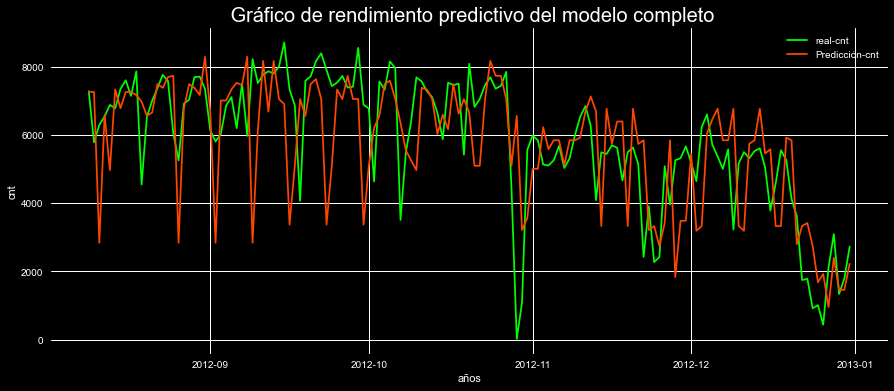

In [88]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(15,6))
plt.plot(test2["cnt"],color="lime", label="real-cnt")
plt.plot(test2["pred"],color="orangered", label="Predicción-cnt")
plt.title(" Gráfico de rendimiento predictivo del modelo completo", fontsize=20)
plt.xlabel('años')
plt.ylabel("cnt")
plt.legend()
plt.show();

Este primer modelo no optimizado genera un R2 del conjunto de prueba de 0,166. Todavía no es genial, así que vea qué se puede hacer usando una búsqueda en cuadrícula. En esta búsqueda en cuadrícula, ajustaremos algunos hiperparámetros:

* **min_samples_split:** El número mínimo de muestras requeridas para dividir un nodo. Los valores más altos generan menos divisiones. Tener menos divisiones hace que un árbol sea menos específico, por lo que esto puede ayudar a evitar el sobreajuste.
* **max_features:** El número de características (variables) a considerar al buscar la mejor división. Cuando usa menos funciones, obliga a las divisiones a ser diferentes entre sí, pero al mismo tiempo, puede estar impidiendo que el árbol encuentre la división que en realidad es la mejor división.
* **Criterio de error:** Como estamos optimizando nuestro R2, potencialmente querríamos usar el R2 como un criterio de error para la decisión de las mejores divisiones. Sin embargo, no está disponible. Por tanto, puede ser interesante probar el MSE y el MAE y ver cuál nos permite optimizar el R2 del árbol completo.

Hay muchos más hiperparámetros en DecisionTreeRegressor. Puede consultar la página de scikit-learn de DecisionTreeRegressor para encontrarlos. No dudes en probar y jugar con esos diferentes parámetros. La búsqueda en cuadrícula se muestra en el Listado 12-4.

## 1-4. Adding un grid search

In [89]:
from sklearn.model_selection import GridSearchCV

grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=44), 
                 {'min_samples_split': list(range(20,50, 2)),
                 'max_features': [0.6, 0.7, 0.8, 0.9, 1.],
                 'criterion': ['mse', 'mae']},
                scoring = 'r2', n_jobs = -1)

# Entrenando al GridSearch
grid_tree.fit(X_train, y_train)

# Haciendo prediciónes
forecast=grid_tree.predict(X_test)

In [ ]:
forecast=np.exp(forecast)

In [97]:
timeseries_evaluation_metrics_func(ytest, forecast)

Resultados de la métrica de evaluación:-
MSE is : 2465599.494694765
MSE is : 1118.7676098549432
RMSE is : 1570.222753208845
MAPE is : 237.86389872531112
R2 is : 0.3016754016910034



Al ejecutar esto en el cuaderno de ejemplo, se creó una puntuación R2 de 0,55. Aunque esto todavía no es sorprendente, es una gran mejora con respecto al modelo anterior. Para averiguar qué parámetros se han elegido, puede obtener los mejores parámetros utilizando `best_estimador_`

## 1-5. Encontrando el best parameters

In [92]:
print(grid_tree.best_estimator_)

DecisionTreeRegressor(criterion='mae', max_features=0.7, min_samples_split=38,
                      random_state=44)


Aparentemente, esta combinación del criterio de error MAE en lugar de MSE, un max_features de 0,8 y un min_samples_split de 48 es el modelo con el mejor rendimiento predictivo. Ahora, hagamos un pronóstico con este modelo y representemos qué tan bien se ajusta

## 1-6. Plotting the prediction

In [95]:
test=pd.DataFrame(ytest)
test["pred"]=forecast
test

,cnt,pred
dteday,,
2012-08-09,7286.0,7335.000000
2012-08-10,5786.0,7335.000000
2012-08-11,6299.0,5119.000000
2012-08-12,6544.0,7403.000000
2012-08-13,6883.0,6751.976007
...,...,...
2012-12-27,2114.0,1263.000000
2012-12-28,3095.0,1693.000000
2012-12-29,1341.0,1693.000000


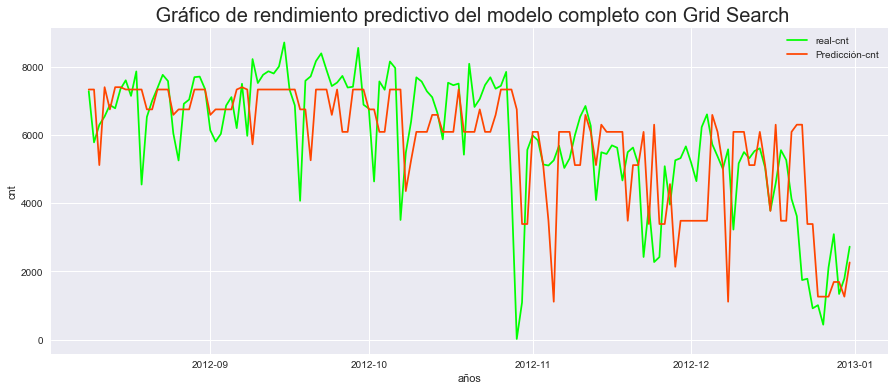

In [98]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.plot(test["cnt"],color="lime", label="real-cnt")
plt.plot(test["pred"],color="orangered", label="Predicción-cnt")
plt.title(" Gráfico de rendimiento predictivo del modelo completo con Grid Search", fontsize=20)
plt.xlabel('años')
plt.ylabel("cnt")
plt.legend()
plt.show();

Una última cosa que es muy práctica con el modelo de árbol de decisión es que puede obtener un gráfico que le muestra las diferentes divisiones que se han identificado. Este tipo de gráfico a veces también se denomina dendrograma. A pesar de los rendimientos más bajos de un modelo de árbol de decisión, uno de sus puntos fuertes es que permite la interpretación en detalle de las decisiones del modelo. Puede hacer esto usando 1-7.

## 1-7. Plotting the prediction

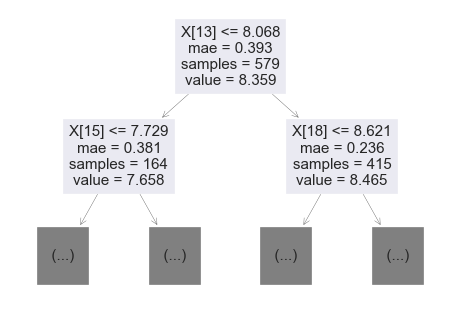

In [99]:
from sklearn.tree import plot_tree
plot_tree(grid_tree.best_estimator_, max_depth=1)
plt.show();

Este tipo de diagrama muestra uno de los valores agregados reales de usar modelos más simples como el modelo de árbol de decisión. Permiten una interpretación del modelo, y esto puede ser necesario en muchas circunstancias. 

## Conclusiones
* El modelo Decision Tree es uno de los modelos de aprendizaje automático supervisado no lineal más simples.
* Puede ajustar la complejidad del árbol de decisión, que define qué tan largo y complejo se vuelve un árbol de decisión.
* Los árboles complejos corren el riesgo de sobreajustarse: aprenden patrones demasiado detallados en los datos de entrenamiento. Puede utilizar una búsqueda de cuadrícula para optimizar la complejidad del árbol.
* Puede crear un dendrograma del árbol de decisión ajustado para obtener todas las divisiones y variables que ha utilizado su modelo.